### Gradient Descent Algorithm implementation on Rosenbrock function

Rosenbrock function is a non convex function which usually used to test optimization algorithms over it. It is defined as,

$\sum_{i=1}^{n-1} (100*(x_{i+1}-x_{i}^2)^2+(x_{i}-1)^2)  \:\:where, n = 20 $

Goal: Find minimum of value of this function and the values of coefficients $x_{i}$.


In first step initialize all the variables $x_{1}$ to $x_{19}$ with some random values.\\
Then, update all the variables using Gradient Descent algorithm for 10000 steps.

For every next iteration variable will be updated as follows.

$$x_{i} \xrightarrow{} x_{i}-alpha*(\nabla(x_{i}))\\
where,\: alpha\: is\: the\: learning\: rate.$$

If you expand the Rosenbrock function, you will easily get to know that we will have 3 different equations for Gradients of $$ x_{1} to x_{20} $$.

$$Equation\:1:  -400*(x_{i+1}-x_{i}^2)*x_{i}+2*(x_{i}-1).................(to\: calculate\: partial\: derivative\: of\: x_{1})$$
$$Equation\:2: 200*(x_{i}-x_{i-1}^2)-400*(x_{i+1}-x_{i}^2)*x_{i}+2*(x_{i}-1)....(to\: calculate\: partial\: derivative\: of\: x_{2}\: to\: x_{18} )$$
$$Equation\:3:200*(x_{i+1}-x_{i}^2)........................(to\: calculate\: partial\: derivative\: of\: x_{19})$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt

f_derv_x1=lambda x1, x2: 2*(x1-1)-400*(x2-(pow(x1,2)))*x1
f_derv_x2to19=lambda x1,x2,x3: 200*(x2-x1**2)+2*(x2-1)-400*(x3-(pow(x2,2)))*x2
f_derv_x20=lambda x1,x2: 200*(x2-x1**2)

f_rosenbrock = lambda x1,x2: 100*(x2-(pow(x1,2)))**2+(x1-1)**2

alpha1 contain different learning rates to test the algorithm with.

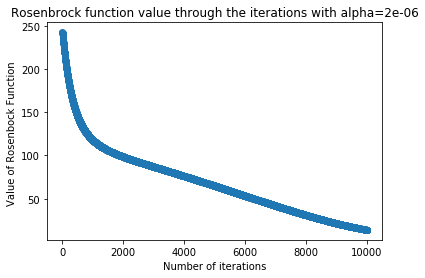

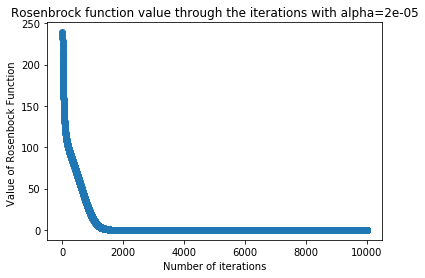

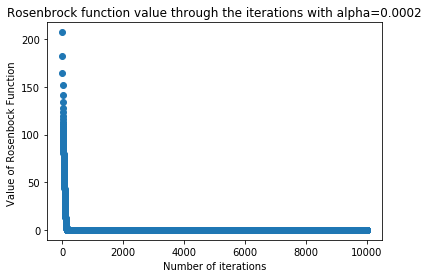

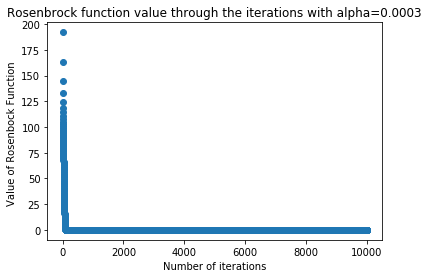

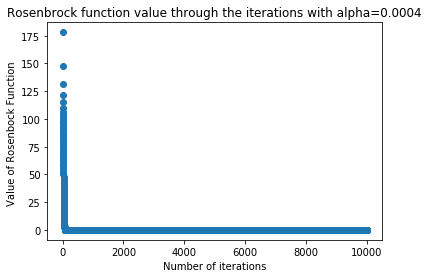

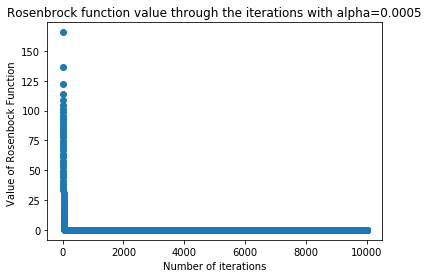

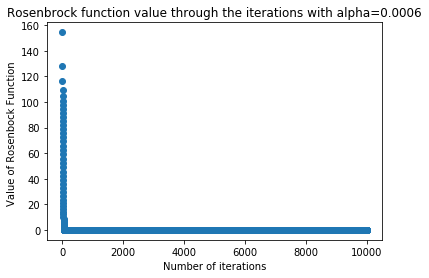

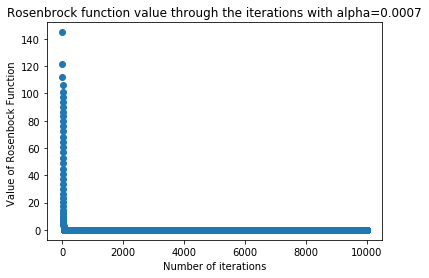

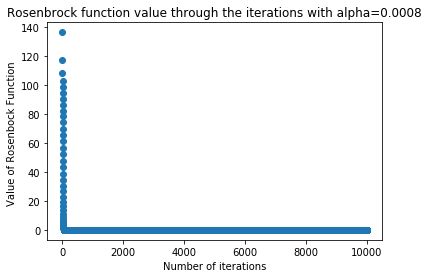

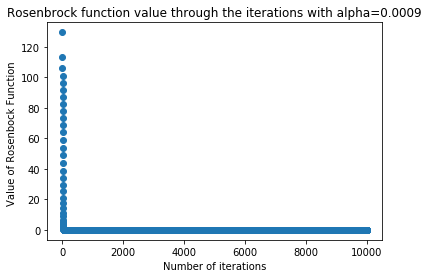

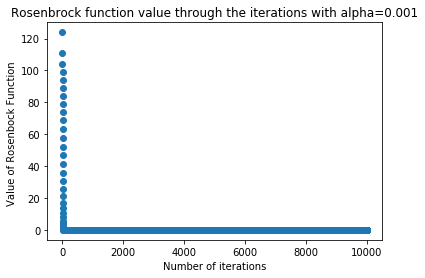

In [5]:

k=20
alpha1=[0.000002,0.00002,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001] 

for alpha in alpha1:
    x=[0.5,0.5,0.8,0.5,0.5,0.79,0.5,0.6,0.8,0.35,0.5,0.6,0.4,0.7,0.8,0.5,0.6,0.5,0.9,0.5] 
    x_temp=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    z=[]
    for n in range(10000):
        x_temp[0]=x[0]-alpha*f_derv_x1(x[0],x[1])
      
        for i in range(1,k-1):
            x_temp[i]=x[i]-alpha*f_derv_x2to19(x[i-1],x[i],x[i+1])
            
        x_temp[k-1]=x[k-1]-alpha*f_derv_x20(x[k-2],x[k-1]) 
       
        x=x_temp.copy()
        sum=0
        for p in range(0,k-2):
            sum=sum+(f_rosenbrock(x[p],x[p+1]))
        z.append(sum)
        
    plt.plot(z,'o')
    plt.title("Rosenbrock function value through the iterations with alpha={}".format(alpha))
    plt.xlabel("Number of iterations")
    plt.ylabel("Value of Rosenbock Function ")

    plt.show()
   

Ideally Rosenbrock function is minimum at 0 and all coefficients $ x_{1} to x_{19}$ equal to 1.
Below you can see optimum values obtained close to ideal values using Gradient Descent Algorithm.

In [12]:
print("Minimum value of Rosenbrock function according to best possible learning rate",z[-1] ) 
print("\nValues of coefficients x : \n",x)

Minimum value of Rosenbrock function according to best possible learning rate 1.0483815173645583e-06

Values of coefficients x : 
 [0.9999999935105311, 0.9999999869967378, 0.9999999739325732, 0.9999999477369866, 0.9999998952139971, 0.9999997899052432, 0.9999995787616441, 0.9999991554200782, 0.9999983066233984, 0.9999966047935527, 0.9999931926440938, 0.9999863513406253, 0.9999726347094935, 0.9999451335096381, 0.9998899960239903, 0.9997794547426752, 0.9995578564636743, 0.9991136991694092, 0.9982237526387381, 0.9964417689192772]
